pandas 是基于 Numpy 构建的，相比numpy专注于计算，pandas更多的用在数据处理方面

其有三种格式

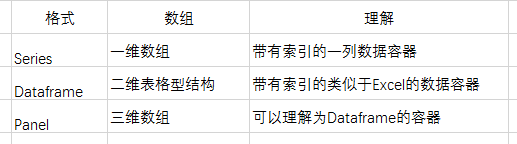

# Series

由一组数据和与之相关的索引组成。

In [3]:
# 创建一个Series：
import pandas as pd
s = pd.Series([1,3,5,7,6,8])
s

0    1
1    3
2    5
3    7
4    6
5    8
dtype: int64

In [4]:
s.index

RangeIndex(start=0, stop=6, step=1)

In [28]:
# 给series加上列名
s.name = 'x'
s

0    1
1    3
2    5
3    7
4    6
5    8
Name: x, dtype: int64

# Dataframe

DataFrame 是一个类似Excel表格的数据结构，其带有索引

创建一个DataFrame

In [46]:
import pandas as pd
d = {'one': [1, 2, 3], 'two': [1, 2, 3]}
df = pd.DataFrame(d,index=['a', 'b', 'c'])
df

,one,two
a,1,1
b,2,2
c,3,3


In [43]:
#创建一个空的 DataFrame
df = pd.DataFrame()
print(df)

Empty DataFrame
Columns: []
Index: []


In [47]:
#查看行
df.index

Index(['a', 'b', 'c'], dtype='object')

In [48]:
# 查看列
df.columns

Index(['one', 'two'], dtype='object')

In [49]:
#查看元素
df.values

array([[1, 1],
       [2, 2],
       [3, 3]], dtype=int64)

In [51]:
# 获取表里面有多少数据
df.size

6

In [19]:
# 一般性的 从api 获取的股票数据，都是dataframe结构
import tushare as ts
df = ts.get_hist_data('000001','2020-01-01')
type(df)

pandas.core.frame.DataFrame

### 从数据分析操作的角度来学习dataframe

查看前几行,查看后几行

In [22]:
import tushare as ts
df = ts.get_k_data('000001','2020-01-01')
df.head(10),df.tail(10)

(         date   open  close   high    low     volume    code
 0  2020-01-02  16.65  16.87  16.95  16.55  1530231.0  000001
 1  2020-01-03  16.94  17.18  17.31  16.92  1116194.0  000001
 2  2020-01-06  17.01  17.07  17.34  16.91   862083.0  000001
 3  2020-01-07  17.13  17.15  17.28  16.95   728607.0  000001
 4  2020-01-08  17.00  16.66  17.05  16.63   847824.0  000001
 5  2020-01-09  16.81  16.79  16.93  16.53  1031636.0  000001
 6  2020-01-10  16.79  16.69  16.81  16.52   585548.0  000001
 7  2020-01-13  16.75  16.99  17.03  16.61   872133.0  000001
 8  2020-01-14  16.99  16.76  17.27  16.76  1304493.0  000001
 9  2020-01-15  16.79  16.52  16.86  16.45   859439.0  000001,
            date   open  close   high    low     volume    code
 151  2020-08-18  15.20  15.15  15.30  14.91  1350261.0  000001
 152  2020-08-19  15.11  15.10  15.35  14.96  1420928.0  000001
 153  2020-08-20  15.01  14.59  15.14  14.53  1333802.0  000001
 154  2020-08-21  14.71  14.45  14.71  14.32  1234517.0  0000

In [26]:
#查看 DataFrame 的列名
list(df.columns)

['date', 'open', 'close', 'high', 'low', 'volume', 'code']

In [27]:
#查看DataFrame 信息
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 161 entries, 0 to 160
Data columns (total 7 columns):
date      161 non-null object
open      161 non-null float64
close     161 non-null float64
high      161 non-null float64
low       161 non-null float64
volume    161 non-null float64
code      161 non-null object
dtypes: float64(5), object(2)
memory usage: 10.1+ KB


In [31]:
# 将series转为dataframe
import pandas as pd
s = pd.Series([1,3,5,7,6,8])
s.name = 'x'
df= s.to_frame()
df

,x
0,1
1,3
2,5
3,7
4,6
5,8


### 在dataframe当中选取数据，主要通过下面几个函数

In [29]:
import tushare as ts
df = ts.get_k_data('000001','2020-01-01')
df.head(30)

,date,open,close,high,low,volume,code
0,2020-01-02,16.65,16.87,16.95,16.55,1530231.0,000001
1,2020-01-03,16.94,17.18,17.31,16.92,1116194.0,000001
2,2020-01-06,17.01,17.07,17.34,16.91,862083.0,000001
3,2020-01-07,17.13,17.15,17.28,16.95,728607.0,000001
4,2020-01-08,17.00,16.66,17.05,16.63,847824.0,000001
5,2020-01-09,16.81,16.79,16.93,16.53,1031636.0,000001
6,2020-01-10,16.79,16.69,16.81,16.52,585548.0,000001
7,2020-01-13,16.75,16.99,17.03,16.61,872133.0,000001
8,2020-01-14,16.99,16.76,17.27,16.76,1304493.0,000001
9,2020-01-15,16.79,16.52,16.86,16.45,859439.0,000001


df.loc[行标签,列标签]

In [33]:
# 选取0，1两行数据
df.loc[0:1]

,date,open,close,high,low,volume,code
0,2020-01-02,16.65,16.87,16.95,16.55,1530231.0,000001
1,2020-01-03,16.94,17.18,17.31,16.92,1116194.0,000001


In [36]:
#选取 某一列的数据
df.loc[0:5,'close']

0    16.87
1    17.18
2    17.07
3    17.15
4    16.66
5    16.79
Name: close, dtype: float64

In [42]:
# 选取某个值
df.loc[0,'close']

16.87

df.loc 的第一个参数是行标签，第二个参数为列标签，两个参数既可以是列表也可以  
是单个字符，如果两个参数都为列表则返回的是 DataFrame，否则，则为 Series。

In [38]:
df.loc[0:5,'open':'low']

,open,close,high,low
0,16.65,16.87,16.95,16.55
1,16.94,17.18,17.31,16.92
2,17.01,17.07,17.34,16.91
3,17.13,17.15,17.28,16.95
4,17.00,16.66,17.05,16.63
5,16.81,16.79,16.93,16.53


df.iloc[行位置,列位置]

In [48]:
#选取第一行及第五行的数据
df.iloc[[0,5],:] 

,date,open,close,high,low,volume,code
0,2020-01-02,16.65,16.87,16.95,16.55,1530231.0,000001
5,2020-01-09,16.81,16.79,16.93,16.53,1031636.0,000001


In [49]:
#选取第一行到第五行（不包含）的数据
df.iloc[0:5,:] 

,date,open,close,high,low,volume,code
0,2020-01-02,16.65,16.87,16.95,16.55,1530231.0,000001
1,2020-01-03,16.94,17.18,17.31,16.92,1116194.0,000001
2,2020-01-06,17.01,17.07,17.34,16.91,862083.0,000001
3,2020-01-07,17.13,17.15,17.28,16.95,728607.0,000001
4,2020-01-08,17.00,16.66,17.05,16.63,847824.0,000001


In [51]:
#选取所有记录的第二列的值，返回的为一个Series
df.iloc[0:5,1] 

0    16.65
1    16.94
2    17.01
3    17.13
4    17.00
Name: open, dtype: float64

In [41]:
#选取第二行，第二列的值，返回的为单个值
df.iloc[1,1] 

16.94

获取某行有一个简单的写法

In [54]:
df.iloc[0]  #第一行

date       2020-01-02
open            16.65
close           16.87
high            16.95
low             16.55
volume    1.53023e+06
code           000001
Name: 0, dtype: object

In [55]:
df.iloc[-1]  #最后一行

date       2020-08-31
open             15.3
close           15.08
high            15.68
low             14.99
volume    1.79713e+06
code           000001
Name: 160, dtype: object

更广义的切片方式是使用.ix，它自动根据给到的索引类型判断是使用位置还是标签进行切片

df.ix[]  #但这个被抛弃了

In [3]:
df.ix[0:5,'open':'low']

d:\vn studio\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,open,close,high,low
0,16.65,16.87,16.95,16.55
1,16.94,17.18,17.31,16.92
2,17.01,17.07,17.34,16.91
3,17.13,17.15,17.28,16.95
4,17.00,16.66,17.05,16.63
5,16.81,16.79,16.93,16.53


使用isin()方法来过滤在指定列中的数据

In [5]:
# 选取 high 列中数为 1 和 774.00 的数。
df[df['high'].isin([17.31,16.34])]

,date,open,close,high,low,volume,code
1,2020-01-03,16.94,17.18,17.31,16.92,1116194.0,000001
13,2020-01-21,16.34,16.00,16.34,15.93,896603.0,000001


### 增

插入一列

In [19]:
import tushare as ts
df = ts.get_k_data('000001','2020-01-01')
del df['code']
df.head(5)

,date,open,close,high,low,volume
0,2020-01-02,16.65,16.87,16.95,16.55,1530231.0
1,2020-01-03,16.94,17.18,17.31,16.92,1116194.0
2,2020-01-06,17.01,17.07,17.34,16.91,862083.0
3,2020-01-07,17.13,17.15,17.28,16.95,728607.0
4,2020-01-08,17.00,16.66,17.05,16.63,847824.0


In [20]:
df.insert(0,'codel','000001')
df.head(5)

,codel,date,open,close,high,low,volume
0,000001,2020-01-02,16.65,16.87,16.95,16.55,1530231.0
1,000001,2020-01-03,16.94,17.18,17.31,16.92,1116194.0
2,000001,2020-01-06,17.01,17.07,17.34,16.91,862083.0
3,000001,2020-01-07,17.13,17.15,17.28,16.95,728607.0
4,000001,2020-01-08,17.00,16.66,17.05,16.63,847824.0


二维数组转为dataframe

In [41]:
import numpy as np
import pandas as pd
a = [[1,2,3],[2,3,4],[2,5,3]]
array1 = np.array(a)
df = pd.DataFrame(array1)
df.columns = ['x','y','z']
print(df)

   x  y  z
0  1  2  3
1  2  3  4
2  2  5  3


二维数组作为新列添加到dataframe

In [48]:
import numpy as np
import pandas as pd
df1 = pd.DataFrame({'a':['a','b','c']})
a = [[1,2,3],[2,3,4],[2,5,3]]
array1 = np.array(a)
df2 = pd.DataFrame(array1)
df2.columns = ['x','y','z']
df = pd.concat([df1,df2],axis=1)
print(df)

   a  x  y  z
0  a  1  2  3
1  b  2  3  4
2  c  2  5  3


### 遍历dataframe

In [43]:
for i in df.index:
    print(i)

0
1
2


In [45]:
for index,row in df.iterrows():
    print(index)
    print(row)

0
a    a
x    1
y    2
z    3
Name: 0, dtype: object
1
a    b
x    2
y    3
z    4
Name: 1, dtype: object
2
a    c
x    2
y    5
z    3
Name: 2, dtype: object


In [49]:
for i in range(len(df)):
    print(df.iloc[i,0])

a
b
c


## 删

In [36]:
# 对于列的删除只需要对列进行切片，保留需要的即可
import tushare as ts
df1 = ts.get_k_data('000001','2020-08-01','2020-08-07')
df1

,date,open,close,high,low,volume,code
140,2020-08-03,13.47,13.59,13.62,13.43,1445096.0,000001
141,2020-08-04,13.66,14.04,14.15,13.48,2445663.0,000001
142,2020-08-05,13.82,13.76,13.85,13.62,1440203.0,000001
143,2020-08-06,13.82,13.90,13.96,13.65,1352511.0,000001
144,2020-08-07,13.80,13.70,13.90,13.62,988678.0,000001


In [38]:

# 删除 volume这一列
df1.pop('volume')
del df1['low']
df2 = df1.drop(['close', 'code'], axis=1)
df2

,date,open,high
140,2020-08-03,13.47,13.62
141,2020-08-04,13.66,14.15
142,2020-08-05,13.82,13.85
143,2020-08-06,13.82,13.96
144,2020-08-07,13.80,13.90


In [39]:
# 删除某一行
df3 = df2.drop([140,141], axis=0)#等效于df3 = df2.drop(index=[140,141], axis=0)
df3

,date,open,high
142,2020-08-05,13.82,13.85
143,2020-08-06,13.82,13.96
144,2020-08-07,13.80,13.90


In [40]:
# 删除含有某个值的那一行
df4 = df3.drop(index=(df3.loc[df3['high']==13.96].index), axis=0)
df4

,date,open,high
142,2020-08-05,13.82,13.85
144,2020-08-07,13.80,13.90


### 改

In [ ]:
修改的部分：先定位到某个位置
直接给这个位置赋值就可以了

从部分dataframe一部分获取最大值

In [55]:
import tushare as ts
df = ts.get_k_data('000001','2020-01-01')

In [56]:
max = df.loc[1:120,'close'].max()
max

17.18

获取最大值的索引

In [57]:
index1 = df.loc[1:120,'close'][df.loc[1:120,'close']==max].index
index1

Int64Index([1], dtype='int64')

判断dataframe是否为空

In [58]:
import pandas as pd
df = pd.DataFrame()
df

""


In [60]:
if df.empty==True:
    print(1)

1


多个条件筛选

In [1]:
import tushare as ts
df = ts.get_hist_data('000001','2020-08-01')
df

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
date,,,,,,,,,,,,,,
2020-10-09,15.30,15.55,15.18,15.13,900425.94,0.01,0.07,15.130,15.390,15.323,905332.64,932398.62,932288.49,0.46
2020-09-30,14.80,15.27,15.17,14.80,1217064.75,0.37,2.50,15.118,15.429,15.309,937449.70,941177.59,951259.28,0.63
2020-09-29,15.39,15.41,14.80,14.76,1182374.38,-0.51,-3.33,15.210,15.456,15.316,813876.85,891712.59,974375.19,0.61
2020-09-28,15.19,15.37,15.31,14.98,612711.12,0.12,0.79,15.364,15.511,15.333,750953.24,839188.42,955938.60,0.32
2020-09-25,15.20,15.31,15.19,15.11,614087.00,0.07,0.46,15.474,15.510,15.322,807643.35,845942.41,1015159.52,0.32
2020-09-24,15.59,15.61,15.12,15.12,1061011.25,-0.51,-3.26,15.650,15.492,15.319,959464.60,879957.34,1104975.17,0.55
2020-09-23,15.59,15.83,15.63,15.51,599200.50,0.06,0.39,15.740,15.514,15.286,944905.47,869565.45,1083257.95,0.31
2020-09-22,15.67,15.84,15.57,15.39,867756.31,-0.29,-1.83,15.702,15.472,15.223,969548.32,911002.65,1090003.81,0.45
2020-09-21,16.00,16.05,15.86,15.71,896161.69,-0.21,-1.31,15.658,15.458,15.174,927423.60,964987.18,1084032.01,0.46


In [64]:
a = df.p_change>0
b = df.ma5>df.ma10
c = df.ma5>df.ma20
d = df.turnover>0.8
df = df[a & (b | c) & d]
df

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
date,,,,,,,,,,,,,,
2020-09-02,15.01,15.53,15.32,15.01,1679383.00,0.18,1.19,15.026,14.760,14.588,1465444.39,1229742.78,1420307.07,0.87
2020-08-28,14.26,15.18,15.13,14.26,2410400.00,0.67,4.63,14.604,14.750,14.380,1087790.73,1404648.96,1472347.44,1.24
2020-08-17,14.60,15.35,15.19,14.55,3268027.75,0.72,4.98,14.470,14.170,13.927,1881724.95,1722339.08,1591992.04,1.68
2020-08-12,14.21,14.50,14.38,14.15,1596811.62,0.25,1.77,14.012,13.816,13.886,1625803.78,1558987.10,1591660.28,0.82
2020-08-11,13.97,14.66,14.13,13.97,2603307.75,0.18,1.29,13.888,13.732,13.880,1594482.10,1551263.98,1613947.84,1.34
2020-08-10,13.67,14.02,13.95,13.62,1587710.38,0.25,1.82,13.870,13.653,13.908,1562953.20,1412633.80,1581460.77,0.82


排序

In [65]:
type(df.index)

pandas.core.indexes.base.Index

In [2]:
# 日期是索引，按日期排序
df.sort_index()

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
date,,,,,,,,,,,,,,
2020-08-03,13.47,13.62,13.59,13.43,1445096.12,0.25,1.87,13.436,13.683,14.266,1262314.40,1461645.01,1837507.20,0.74
2020-08-04,13.66,14.15,14.04,13.48,2445663.25,0.45,3.31,13.576,13.638,14.194,1508045.85,1580924.78,1761568.99,1.26
2020-08-05,13.82,13.85,13.76,13.62,1440203.25,-0.28,-1.99,13.620,13.573,14.094,1492170.42,1593649.94,1702012.19,0.74
2020-08-06,13.82,13.96,13.90,13.65,1352510.75,0.14,1.02,13.726,13.562,14.013,1569859.05,1526148.43,1657438.00,0.70
2020-08-07,13.80,13.90,13.70,13.62,988678.38,-0.20,-1.44,13.798,13.582,13.955,1534430.35,1441928.09,1598933.26,0.51
2020-08-10,13.67,14.02,13.95,13.62,1587710.38,0.25,1.82,13.870,13.653,13.908,1562953.20,1412633.80,1581460.77,0.82
2020-08-11,13.97,14.66,14.13,13.97,2603307.75,0.18,1.29,13.888,13.732,13.880,1594482.10,1551263.98,1613947.84,1.34
2020-08-12,14.21,14.50,14.38,14.15,1596811.62,0.25,1.77,14.012,13.816,13.886,1625803.78,1558987.10,1591660.28,0.82
2020-08-13,14.40,14.46,14.18,14.14,837261.75,-0.20,-1.39,14.068,13.897,13.887,1522753.98,1546306.51,1536978.80,0.43


In [102]:
import tushare as ts
df = ts.get_k_data('000001','2020-08-01')
df

,date,open,close,high,low,volume,code
140,2020-08-03,13.47,13.59,13.62,13.43,1445096.0,000001
141,2020-08-04,13.66,14.04,14.15,13.48,2445663.0,000001
142,2020-08-05,13.82,13.76,13.85,13.62,1440203.0,000001
143,2020-08-06,13.82,13.90,13.96,13.65,1352511.0,000001
144,2020-08-07,13.80,13.70,13.90,13.62,988678.0,000001
145,2020-08-10,13.67,13.95,14.02,13.62,1587710.0,000001
146,2020-08-11,13.97,14.13,14.66,13.97,2603308.0,000001
147,2020-08-12,14.21,14.38,14.50,14.15,1596812.0,000001
148,2020-08-13,14.40,14.18,14.46,14.14,837262.0,000001
149,2020-08-14,14.10,14.47,14.51,14.06,1103216.0,000001


In [103]:
type(df.date[140])

str

In [108]:

df.date = pd.to_datetime(df.date)

pandas._libs.tslibs.timestamps.Timestamp

In [72]:
#日期不是索引，将df按照日期排序
df.sort_values(by='date',ascending=False,inplace=True)
df

,date,open,close,high,low,volume,code
163,2020-09-03,15.32,14.90,15.33,14.84,1279842.0,000001
162,2020-09-02,15.01,15.32,15.53,15.01,1679383.0,000001
161,2020-09-01,14.96,15.14,15.23,14.88,813643.0,000001
160,2020-08-31,15.30,15.08,15.68,14.99,1797130.0,000001
159,2020-08-28,14.26,15.13,15.18,14.26,2410400.0,000001
158,2020-08-27,14.40,14.46,14.46,14.11,626667.0,000001
157,2020-08-26,14.60,14.37,14.61,14.28,734118.0,000001
156,2020-08-25,14.56,14.60,14.69,14.46,748320.0,000001
155,2020-08-24,14.50,14.46,14.71,14.41,919449.0,000001
154,2020-08-21,14.71,14.45,14.71,14.32,1234517.0,000001


再重新设置索引

In [73]:
df.reset_index(drop = True,inplace=True)
df

,date,open,close,high,low,volume,code
0,2020-09-03,15.32,14.90,15.33,14.84,1279842.0,000001
1,2020-09-02,15.01,15.32,15.53,15.01,1679383.0,000001
2,2020-09-01,14.96,15.14,15.23,14.88,813643.0,000001
3,2020-08-31,15.30,15.08,15.68,14.99,1797130.0,000001
4,2020-08-28,14.26,15.13,15.18,14.26,2410400.0,000001
5,2020-08-27,14.40,14.46,14.46,14.11,626667.0,000001
6,2020-08-26,14.60,14.37,14.61,14.28,734118.0,000001
7,2020-08-25,14.56,14.60,14.69,14.46,748320.0,000001
8,2020-08-24,14.50,14.46,14.71,14.41,919449.0,000001
9,2020-08-21,14.71,14.45,14.71,14.32,1234517.0,000001


In [109]:
df.set_index('date',inplace=True)
df

,open,close,high,low,volume,code
date,,,,,,
2020-08-03,13.47,13.59,13.62,13.43,1445096.0,000001
2020-08-04,13.66,14.04,14.15,13.48,2445663.0,000001
2020-08-05,13.82,13.76,13.85,13.62,1440203.0,000001
2020-08-06,13.82,13.90,13.96,13.65,1352511.0,000001
2020-08-07,13.80,13.70,13.90,13.62,988678.0,000001
2020-08-10,13.67,13.95,14.02,13.62,1587710.0,000001
2020-08-11,13.97,14.13,14.66,13.97,2603308.0,000001
2020-08-12,14.21,14.38,14.50,14.15,1596812.0,000001
2020-08-13,14.40,14.18,14.46,14.14,837262.0,000001


concat 可以沿一条轴将多个对象堆叠到一起。
分别获取两个DataFrame。

In [111]:
import tushare as ts
df1 = ts.get_k_data('000001','2020-08-01','2020-08-07')
df1

,date,open,close,high,low,volume,code
140,2020-08-03,13.47,13.59,13.62,13.43,1445096.0,000001
141,2020-08-04,13.66,14.04,14.15,13.48,2445663.0,000001
142,2020-08-05,13.82,13.76,13.85,13.62,1440203.0,000001
143,2020-08-06,13.82,13.90,13.96,13.65,1352511.0,000001
144,2020-08-07,13.80,13.70,13.90,13.62,988678.0,000001


In [112]:
df2 = ts.get_k_data('000001','2020-08-10','2020-08-15')
df2

,date,open,close,high,low,volume,code
145,2020-08-10,13.67,13.95,14.02,13.62,1587710.0,000001
146,2020-08-11,13.97,14.13,14.66,13.97,2603308.0,000001
147,2020-08-12,14.21,14.38,14.50,14.15,1596812.0,000001
148,2020-08-13,14.40,14.18,14.46,14.14,837262.0,000001
149,2020-08-14,14.10,14.47,14.51,14.06,1103216.0,000001


In [114]:
df3 = pd.concat([df1,df2],axis=0)
df3

,date,open,close,high,low,volume,code
140,2020-08-03,13.47,13.59,13.62,13.43,1445096.0,000001
141,2020-08-04,13.66,14.04,14.15,13.48,2445663.0,000001
142,2020-08-05,13.82,13.76,13.85,13.62,1440203.0,000001
143,2020-08-06,13.82,13.90,13.96,13.65,1352511.0,000001
144,2020-08-07,13.80,13.70,13.90,13.62,988678.0,000001
145,2020-08-10,13.67,13.95,14.02,13.62,1587710.0,000001
146,2020-08-11,13.97,14.13,14.66,13.97,2603308.0,000001
147,2020-08-12,14.21,14.38,14.50,14.15,1596812.0,000001
148,2020-08-13,14.40,14.18,14.46,14.14,837262.0,000001
149,2020-08-14,14.10,14.47,14.51,14.06,1103216.0,000001


In [117]:
df4 = pd.concat([df1,df2],axis=1)
df4

,date,open,close,high,low,volume,code,date,open,close,high,low,volume,code
140,2020-08-03,13.47,13.59,13.62,13.43,1445096.0,000001,NaN,NaN,NaN,NaN,NaN,NaN,NaN
141,2020-08-04,13.66,14.04,14.15,13.48,2445663.0,000001,NaN,NaN,NaN,NaN,NaN,NaN,NaN
142,2020-08-05,13.82,13.76,13.85,13.62,1440203.0,000001,NaN,NaN,NaN,NaN,NaN,NaN,NaN
143,2020-08-06,13.82,13.90,13.96,13.65,1352511.0,000001,NaN,NaN,NaN,NaN,NaN,NaN,NaN
144,2020-08-07,13.80,13.70,13.90,13.62,988678.0,000001,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-08-10,13.67,13.95,14.02,13.62,1587710.0,000001
146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-08-11,13.97,14.13,14.66,13.97,2603308.0,000001
147,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-08-12,14.21,14.38,14.50,14.15,1596812.0,000001
148,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-08-13,14.40,14.18,14.46,14.14,837262.0,000001
149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-08-14,14.10,14.47,14.51,14.06,1103216.0,000001


只增加一行

In [121]:
s = df1.iloc[0]
df1 = df1.append(s, ignore_index=False) # ignore_index=False 表示索引不变
df1

,date,open,close,high,low,volume,code
140,2020-08-03,13.47,13.59,13.62,13.43,1445096.0,000001
141,2020-08-04,13.66,14.04,14.15,13.48,2445663.0,000001
142,2020-08-05,13.82,13.76,13.85,13.62,1440203.0,000001
143,2020-08-06,13.82,13.90,13.96,13.65,1352511.0,000001
144,2020-08-07,13.80,13.70,13.90,13.62,988678.0,000001
140,2020-08-03,13.47,13.59,13.62,13.43,1445096.0,000001


查看重复数据：

In [122]:
df1.duplicated()

140    False
141    False
142    False
143    False
144    False
140     True
dtype: bool

移除重复数据：

In [123]:
df1.drop_duplicates()

,date,open,close,high,low,volume,code
140,2020-08-03,13.47,13.59,13.62,13.43,1445096.0,000001
141,2020-08-04,13.66,14.04,14.15,13.48,2445663.0,000001
142,2020-08-05,13.82,13.76,13.85,13.62,1440203.0,000001
143,2020-08-06,13.82,13.90,13.96,13.65,1352511.0,000001
144,2020-08-07,13.80,13.70,13.90,13.62,988678.0,000001


In [124]:
df1['high_cahnge']=df1.high-df1.high.shift(1)
df1

,date,open,close,high,low,volume,code,high_cahnge
140,2020-08-03,13.47,13.59,13.62,13.43,1445096.0,000001,NaN
141,2020-08-04,13.66,14.04,14.15,13.48,2445663.0,000001,0.53
142,2020-08-05,13.82,13.76,13.85,13.62,1440203.0,000001,-0.30
143,2020-08-06,13.82,13.90,13.96,13.65,1352511.0,000001,0.11
144,2020-08-07,13.80,13.70,13.90,13.62,988678.0,000001,-0.06
140,2020-08-03,13.47,13.59,13.62,13.43,1445096.0,000001,-0.28


In [130]:
df1['low_cahnge']=df1.low-df1.low.shift(-2)
df1

,date,open,close,high,low,volume,code,high_cahnge,low_cahnge
140,2020-08-03,13.47,13.59,13.62,13.43,1445096.0,000001,NaN,-0.19
141,2020-08-04,13.66,14.04,14.15,13.48,2445663.0,000001,0.53,-0.17
142,2020-08-05,13.82,13.76,13.85,13.62,1440203.0,000001,-0.30,0.00
143,2020-08-06,13.82,13.90,13.96,13.65,1352511.0,000001,0.11,0.22
144,2020-08-07,13.80,13.70,13.90,13.62,988678.0,000001,-0.06,NaN
140,2020-08-03,13.47,13.59,13.62,13.43,1445096.0,000001,-0.28,NaN


In [126]:
#去掉包含缺失值的行
df1.dropna()

,date,open,close,high,low,volume,code,high_cahnge,low_cahnge
141,2020-08-04,13.66,14.04,14.15,13.48,2445663.0,000001,0.53,-0.17
142,2020-08-05,13.82,13.76,13.85,13.62,1440203.0,000001,-0.30,0.00
143,2020-08-06,13.82,13.90,13.96,13.65,1352511.0,000001,0.11,0.22


对缺失值进行填充为30

In [129]:
df1.fillna(value=30)

,date,open,close,high,low,volume,code,high_cahnge,low_cahnge
140,2020-08-03,13.47,13.59,13.62,13.43,1445096.0,000001,30.00,-0.19
141,2020-08-04,13.66,14.04,14.15,13.48,2445663.0,000001,0.53,-0.17
142,2020-08-05,13.82,13.76,13.85,13.62,1440203.0,000001,-0.30,0.00
143,2020-08-06,13.82,13.90,13.96,13.65,1352511.0,000001,0.11,0.22
144,2020-08-07,13.80,13.70,13.90,13.62,988678.0,000001,-0.06,30.00
140,2020-08-03,13.47,13.59,13.62,13.43,1445096.0,000001,-0.28,30.00


筛选排除掉空值

In [131]:
df1 = df1.loc[df1['high_cahnge'].isna()==False] 
df1

,date,open,close,high,low,volume,code,high_cahnge,low_cahnge
141,2020-08-04,13.66,14.04,14.15,13.48,2445663.0,000001,0.53,-0.17
142,2020-08-05,13.82,13.76,13.85,13.62,1440203.0,000001,-0.30,0.00
143,2020-08-06,13.82,13.90,13.96,13.65,1352511.0,000001,0.11,0.22
144,2020-08-07,13.80,13.70,13.90,13.62,988678.0,000001,-0.06,NaN
140,2020-08-03,13.47,13.59,13.62,13.43,1445096.0,000001,-0.28,NaN


保留两位小数

In [132]:
df1.loc[:,'high_cahnge'] = round(df1.loc[:,'high_cahnge'],1)
df1

d:\vn studio\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,date,open,close,high,low,volume,code,high_cahnge,low_cahnge
141,2020-08-04,13.66,14.04,14.15,13.48,2445663.0,000001,0.5,-0.17
142,2020-08-05,13.82,13.76,13.85,13.62,1440203.0,000001,-0.3,0.00
143,2020-08-06,13.82,13.90,13.96,13.65,1352511.0,000001,0.1,0.22
144,2020-08-07,13.80,13.70,13.90,13.62,988678.0,000001,-0.1,NaN
140,2020-08-03,13.47,13.59,13.62,13.43,1445096.0,000001,-0.3,NaN


### 计算波动率

某个变量的波动率定义为这一变量在单位时间内连续复利回报率的标准差。    
对数收益率的历史移动标准差，也就是历史移动波动率      
1.先计算某只股票的对数收益  
2.由对数收益率计算波动率

滑动计算  rolling()   
DataFrame.rolling(window, min_periods=None, freq=None, center=False, win_type=None, on=None, axis=0, closed=None)  
window：表示时间窗的大小  


In [72]:
import tushare as ts
import numpy as np
df1 = ts.get_k_data('000001','2020-01-01','2020-08-07')
df1.head(5)

,date,open,close,high,low,volume,code
0,2020-01-02,16.65,16.87,16.95,16.55,1530231.0,000001
1,2020-01-03,16.94,17.18,17.31,16.92,1116194.0,000001
2,2020-01-06,17.01,17.07,17.34,16.91,862083.0,000001
3,2020-01-07,17.13,17.15,17.28,16.95,728607.0,000001
4,2020-01-08,17.00,16.66,17.05,16.63,847824.0,000001


In [73]:
# 1.先计算某只股票的对数收益
df1['log_return']=np.log(df1['close']/df1['close'].shift(1))
df1.head(5)

,date,open,close,high,low,volume,code,log_return
0,2020-01-02,16.65,16.87,16.95,16.55,1530231.0,000001,NaN
1,2020-01-03,16.94,17.18,17.31,16.92,1116194.0,000001,0.018209
2,2020-01-06,17.01,17.07,17.34,16.91,862083.0,000001,-0.006423
3,2020-01-07,17.13,17.15,17.28,16.95,728607.0,000001,0.004676
4,2020-01-08,17.00,16.66,17.05,16.63,847824.0,000001,-0.028988


In [74]:
# 2.由对数收益率计算波动率  月和年的话你可以用日波动率乘以30开方和365开方
df1['volatility'] = df1['log_return'].rolling(window=5).std()*np.sqrt(5)
df1.head(10)

,date,open,close,high,low,volume,code,log_return,volatility
0,2020-01-02,16.65,16.87,16.95,16.55,1530231.0,000001,NaN,NaN
1,2020-01-03,16.94,17.18,17.31,16.92,1116194.0,000001,0.018209,NaN
2,2020-01-06,17.01,17.07,17.34,16.91,862083.0,000001,-0.006423,NaN
3,2020-01-07,17.13,17.15,17.28,16.95,728607.0,000001,0.004676,NaN
4,2020-01-08,17.00,16.66,17.05,16.63,847824.0,000001,-0.028988,NaN
5,2020-01-09,16.81,16.79,16.93,16.53,1031636.0,000001,0.007773,0.040169
6,2020-01-10,16.79,16.69,16.81,16.52,585548.0,000001,-0.005974,0.032250
7,2020-01-13,16.75,16.99,17.03,16.61,872133.0,000001,0.017815,0.039862
8,2020-01-14,16.99,16.76,17.27,16.76,1304493.0,000001,-0.013630,0.040831
9,2020-01-15,16.79,16.52,16.86,16.45,859439.0,000001,-0.014423,0.031485


### Groupby

In [ ]:
DataFrame.groupby(by=None, axis=0, level=None, as_index=True, sort=True, group_keys=True, squeeze=False, **kwargs)

In [78]:
import pandas as pd
 
df = pd.DataFrame({'code' : ['000001', '000002', '000003', '000001', '000002', '000003', '000001', '000002', '000003'],
          'time' : ['2020-01-01', '2020-01-01', '2020-01-01', '2020-01-02', '2020-01-02', '2020-01-02', '2020-01-03', '2020-01-03', '2020-01-03'],
          'close' : [4.5, 2.9, 3.8, 3.7, 4.0, 4.1, 1.9, 4.1, 3.2],
         'tag' : [1.5, 1.9, 2.8, 1.7, 4.1, 2.5, 1.1, 3.4, 1.2]
         })
df

,code,time,close,tag
0,000001,2020-01-01,4.5,1.5
1,000002,2020-01-01,2.9,1.9
2,000003,2020-01-01,3.8,2.8
3,000001,2020-01-02,3.7,1.7
4,000002,2020-01-02,4.0,4.1
5,000003,2020-01-02,4.1,2.5
6,000001,2020-01-03,1.9,1.1
7,000002,2020-01-03,4.1,3.4
8,000003,2020-01-03,3.2,1.2


In [80]:
df.groupby('code').mean()

,close,tag
code,,
000001,3.366667,1.433333
000002,3.666667,3.133333
000003,3.700000,2.166667


In [82]:
df.groupby('time').max()

,code,close,tag
time,,,
2020-01-01,000003,4.5,2.8
2020-01-02,000003,4.1,4.1
2020-01-03,000003,4.1,3.4


In [84]:
df.groupby(['code','time'])['close'].mean()

code    time      
000001  2020-01-01    4.5
        2020-01-02    3.7
        2020-01-03    1.9
000002  2020-01-01    2.9
        2020-01-02    4.0
        2020-01-03    4.1
000003  2020-01-01    3.8
        2020-01-02    4.1
        2020-01-03    3.2
Name: close, dtype: float64

### Resample 重采样

In [ ]:
DataFrame.resample(rule, how=None, axis=0, fill_method=None, closed=None, label=None, convention='start', kind=None, loffset=None, limit=None, base=0, on=None, level=None)

### 采样间隔
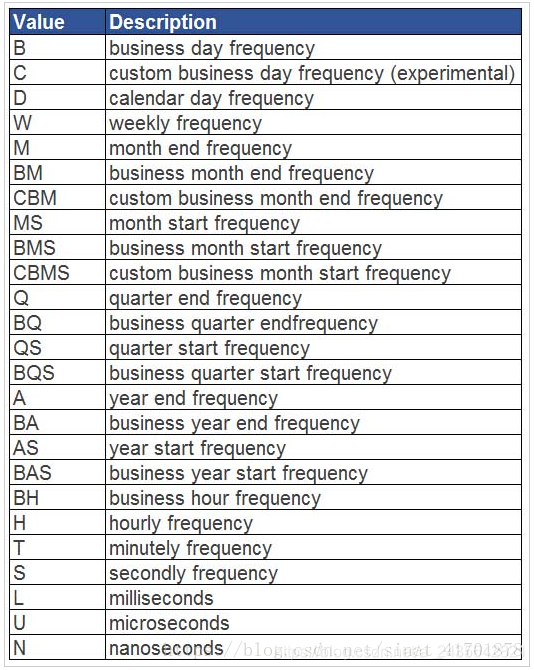

In [88]:
import tushare as ts
import numpy as np
df1 = ts.get_hist_data('000001','2020-08-01','2020-08-07',ktype = '60')
df1.head(5)

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
date,,,,,,,,,,,,,,
2020-08-06 15:00:00,13.72,13.92,13.90,13.72,348490.0,0.18,1.31,13.804,13.846,13.6650,312244.0,387795.0,385275.0,0.20
2020-08-06 14:00:00,13.83,13.83,13.72,13.69,186403.0,-0.11,-0.80,13.782,13.844,13.6395,283227.0,434343.0,381481.0,0.11
2020-08-06 11:30:00,13.77,13.83,13.83,13.65,277258.0,0.06,0.44,13.802,13.824,13.6250,287071.0,461282.0,378913.0,0.16
2020-08-06 10:30:00,13.81,13.96,13.78,13.77,513026.0,-0.03,-0.22,13.780,13.799,13.6050,382840.0,461309.0,373346.0,0.30
2020-08-05 15:00:00,13.78,13.82,13.79,13.74,236044.0,0.01,0.07,13.828,13.775,13.5875,360434.0,434807.0,366199.0,0.14


In [92]:
df1.index= pd.DatetimeIndex(df1.index)
df1.resample('D').first()  #mean(),max(),min(),last()

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
date,,,,,,,,,,,,,,
2020-08-03,13.46,13.61,13.48,13.46,634289.0,0.02,0.15,13.362,13.403,13.3675,356742.0,302746.0,338922.0,0.37
2020-08-04,13.65,13.65,13.52,13.48,455792.0,-0.13,-0.95,13.526,13.435,13.4260,372833.0,328618.0,307755.0,0.27
2020-08-05,13.83,13.83,13.72,13.62,756106.0,-0.11,-0.80,13.846,13.670,13.5410,635493.0,477778.0,378458.0,0.44
2020-08-06,13.81,13.96,13.78,13.77,513026.0,-0.03,-0.22,13.780,13.799,13.6050,382840.0,461309.0,373346.0,0.30


## 面试题

In [ ]:
#  iid_list 是 tick 级数据，按照合约（InstrumentID）分成不同的 df（以 SysTime 为轴，按照分钟对LastPrice的最大值的最小值进行重采样）

In [18]:
import pandas as pd
df = pd.read_csv('iid_list.csv')
df.head(10)

,SysTime,TradingDay,InstrumentID,LastPrice,PreSettlementPrice,PreClosePrice,PreOpenInterest,OpenPrice,HighestPrice,LowestPrice,...,UpperLimitPrice,LowerLimitPrice,UpdateTime,UpdateMillisec,BidPrice1,BidVolume1,AskPrice1,AskVolume1,AveragePrice,ActionDay
0,2019-09-02 09:29:00.000,20190902,IC1909,4864.8,4837.2,4859.0,98180.0,4864.8,4864.8,4864.8,...,5320.8,4353.6,09:29:00,0,4862.0,2,4864.8,1,0.0,20190902
1,2019-09-02 09:29:00.000,20190902,IC2003,4631.0,4611.2,4631.0,13792.0,4631.0,4631.0,4631.0,...,5072.2,4150.2,09:29:00,0,4627.2,1,4635.4,1,0.0,20190902
2,2019-09-02 09:29:00.000,20190902,IC1912,4732.0,4709.0,4732.0,32620.0,1.7976931348623157e+308,1.7976931348623157e+308,1.7976931348623157e+308,...,5179.8,4238.2,09:29:00,0,4730.0,6,4733.4,1,0.0,20190902
3,2019-09-02 09:29:00.000,20190902,IC1910,4812.0,4792.0,4812.0,5460.0,1.7976931348623157e+308,1.7976931348623157e+308,1.7976931348623157e+308,...,5271.2,4312.8,09:29:00,0,4806.4,1,4819.8,1,0.0,20190902
4,2019-09-02 09:30:00.500,20190902,IC1910,4812.0,4792.0,4812.0,5460.0,1.7976931348623157e+308,1.7976931348623157e+308,1.7976931348623157e+308,...,5271.2,4312.8,09:30:00,500,4814.4,1,4819.8,1,0.0,20190902
5,2019-09-02 09:30:00.500,20190902,IC1912,4733.4,4709.0,4732.0,32620.0,4733.4,4737.0,4733.4,...,5179.8,4238.2,09:30:00,500,4733.4,7,4733.6,2,0.0,20190902
6,2019-09-02 09:30:00.500,20190902,IC1909,4862.0,4837.2,4859.0,98180.0,4864.8,4865.0,4861.0,...,5320.8,4353.6,09:30:00,500,4860.2,5,4861.8,1,0.0,20190902
7,2019-09-02 09:30:00.500,20190902,IC2003,4635.4,4611.2,4631.0,13792.0,4631.0,4635.4,4631.0,...,5072.2,4150.2,09:30:00,500,4636.0,1,4638.4,1,0.0,20190902
8,2019-09-02 09:30:01.000,20190902,IC1912,4733.4,4709.0,4732.0,32620.0,4733.4,4737.0,4733.4,...,5179.8,4238.2,09:30:01,0,4733.4,4,4733.6,3,0.0,20190902
9,2019-09-02 09:30:01.000,20190902,IC1909,4861.2,4837.2,4859.0,98180.0,4864.8,4865.0,4860.2,...,5320.8,4353.6,09:30:01,0,4861.2,4,4861.8,1,0.0,20190902


In [19]:
df.groupby('TradingDay').describe()

LastPrice                                                          \
               count         mean        std     min     25%     50%     75%   
TradingDay                                                                     
20190902     83961.0  4858.474587  95.296672  4625.4  4785.6  4869.8  4935.0   
20190903     72667.0  4908.073337  83.992080  4741.4  4858.2  4942.8  4985.4   
20190904     81975.0  4944.449059  85.175387  4767.8  4888.0  4970.2  5015.8   
20190905     90249.0  5088.836111  77.169391  4900.0  5032.6  5100.4  5149.8   
20190906     84453.0  5068.149901  72.730812  4916.2  5029.6  5096.0  5131.4   
20190909     86454.0  5131.111585  73.270984  4975.0  5078.2  5141.8  5189.2   
20190910     83673.0  5155.088937  70.361684  5005.4  5118.2  5178.6  5214.6   
20190911     87607.0  5157.494113  69.349982  5014.4  5117.6  5176.6  5215.8   
20190912     82408.0  5163.305572  63.925341  5024.8  5124.4  5185.4  5216.2   
20190916     85497.0  5185.883413  67.475226  5027.0  5144.8  5210.6  5240.8   
20190917     90986.0  5091.364944  75.362995  4920.6  5032.0  5110.4  5148.0   
20190918     86528.0  5070.472656  73.497692  4927.0  5030.6  5106.0  5133.4   
20190919     90017.0  5078.213315  74.481432  4918.0  5036.2  5109.2  5139.6   
20190920     86456.0  5113.350687  74.360482  4973.0  5075.6  5145.0  5171.6   
20190923     63554.0  5030.006218  66.765160  4911.4  5004.4  5025.0  5088.8   
20190924     70378.0  5096.901623  72.294964  4950.4  5042.0  5103.6  5156.2   
20190925     67430.0  5008.453344  66.968604  4878.0  4931.6  5007.4  5072.4   
20190926     71250.0  4937.026723  71.023801  4792.0  4887.2  4953.0  4985.2   
20190927     65399.0  4924.812905  65.592453  4797.6  4846.0  4923.2  4988.0   
20190930     64395.0  4893.377473  68.609675  4714.0  4832.6  4898.6  4953.8   

                   PreSettlementPrice               ... AveragePrice       \
               max              count         mean  ...          75%  max   
TradingDay                                          ...                     
20190902    5006.8            83961.0  4749.191048  ...          0.0  0.0   
20190903    5008.4            72667.0  4907.875049  ...          0.0  0.0   
20190904    5098.0            81975.0  4908.037953  ...          0.0  0.0   
20190905    5212.0            90249.0  4962.085404  ...          0.0  0.0   
20190906    5168.6            84453.0  5062.735739  ...          0.0  0.0   
20190909    5249.8            86454.0  5059.011636  ...          0.0  0.0   
20190910    5255.0            83673.0  5163.604345  ...          0.0  0.0   
20190911    5275.8            87607.0  5161.212056  ...          0.0  0.0   
20190912    5269.4            82408.0  5149.968535  ...          0.0  0.0   
20190916    5279.2            85497.0  5185.612316  ...          0.0  0.0   
20190917    5226.8            90986.0  5166.121379  ...          0.0  0.0   
20190918    5160.2            86528.0  5064.359465  ...          0.0  0.0   
20190919    5187.8            90017.0  5069.662293  ...          0.0  0.0   
20190920    5217.0            86456.0  5087.253049  ...          0.0  0.0   
20190923    5148.0            63554.0  5086.554612  ...          0.0  0.0   
20190924    5223.4            70378.0  5046.992020  ...          0.0  0.0   
20190925    5114.0            67430.0  5072.767169  ...          0.0  0.0   
20190926    5072.6            71250.0  4996.354700  ...          0.0  0.0   
20190927    5014.4            65399.0  4900.624881  ...          0.0  0.0   
20190930    5003.4            64395.0  4917.728429  ...          0.0  0.0   

           ActionDay                                                       \
               count        mean  std         min         25%         50%   
TradingDay                                                                  
20190902     83961.0  20190902.0  0.0  20190902.0  20190902.0  20190902.0   
20190903     72667.0  20190903.0  0.0  20190903.0  20190903.0  20190903.0   
20190904     

In [9]:
df.groupby('InstrumentID').describe()

TradingDay                                                  \
                  count          mean       std         min         25%   
InstrumentID                                                              
IC1909         373610.0  2.019091e+07  5.948210  20190902.0  20190905.0   
IC1910         447750.0  2.019092e+07  8.433337  20190902.0  20190910.0   
IC1912         438616.0  2.019092e+07  8.611497  20190902.0  20190909.0   
IC2003         335361.0  2.019092e+07  8.595830  20190902.0  20190909.0   

                                                 LastPrice               ...  \
                     50%         75%         max     count         mean  ...   
InstrumentID                                                             ...   
IC1909        20190910.0  20190917.0  20190920.0  373610.0  5144.854071  ...   
IC1910        20190918.0  20190924.0  20190930.0  447750.0  5093.446618  ...   
IC1912        20190917.0  20190924.0  20190930.0  438616.0  5022.377806  ...   
IC2003        20190917.0  20190924.0  20190930.0  335361.0  4930.281307  ...   

             AveragePrice      ActionDay                                      \
                      75%  max     count          mean       std         min   
InstrumentID                                                                   
IC1909                0.0  0.0  373610.0  2.019091e+07  5.948210  20190902.0   
IC1910                0.0  0.0  447750.0  2.019092e+07  8.433337  20190902.0   
IC1912                0.0  0.0  438616.0  2.019092e+07  8.611497  20190902.0   
IC2003                0.0  0.0  335361.0  2.019092e+07  8.595830  20190902.0   

                                                              
                     25%         50%         75%         max  
InstrumentID                                                  
IC1909        20190905.0  20190910.0  20190917.0  20190920.0  
IC1910        20190910.0  20190918.0  20190924.0  20190930.0  
IC1912        20190909.0  20190917.0  20190924.0  20190930.0  
IC2003        20190909.0  20190917.0  20190924.0  20190930.0  

[4 rows x 136 columns]

In [20]:
df1 = df[df['InstrumentID']=='IC1909']
df1.head(10)

,SysTime,TradingDay,InstrumentID,LastPrice,PreSettlementPrice,PreClosePrice,PreOpenInterest,OpenPrice,HighestPrice,LowestPrice,...,UpperLimitPrice,LowerLimitPrice,UpdateTime,UpdateMillisec,BidPrice1,BidVolume1,AskPrice1,AskVolume1,AveragePrice,ActionDay
0,2019-09-02 09:29:00.000,20190902,IC1909,4864.8,4837.2,4859.0,98180.0,4864.8,4864.8,4864.8,...,5320.8,4353.6,09:29:00,0,4862.0,2,4864.8,1,0.0,20190902
6,2019-09-02 09:30:00.500,20190902,IC1909,4862.0,4837.2,4859.0,98180.0,4864.8,4865.0,4861.0,...,5320.8,4353.6,09:30:00,500,4860.2,5,4861.8,1,0.0,20190902
9,2019-09-02 09:30:01.000,20190902,IC1909,4861.2,4837.2,4859.0,98180.0,4864.8,4865.0,4860.2,...,5320.8,4353.6,09:30:01,0,4861.2,4,4861.8,1,0.0,20190902
14,2019-09-02 09:30:01.500,20190902,IC1909,4861.6,4837.2,4859.0,98180.0,4864.8,4865.0,4860.2,...,5320.8,4353.6,09:30:01,500,4861.4,1,4861.8,1,0.0,20190902
19,2019-09-02 09:30:02.000,20190902,IC1909,4862.2,4837.2,4859.0,98180.0,4864.8,4865.0,4860.2,...,5320.8,4353.6,09:30:02,0,4862.0,1,4862.2,2,0.0,20190902
22,2019-09-02 09:30:02.500,20190902,IC1909,4861.8,4837.2,4859.0,98180.0,4864.8,4865.0,4860.2,...,5320.8,4353.6,09:30:02,500,4862.2,1,4864.6,1,0.0,20190902
26,2019-09-02 09:30:03.000,20190902,IC1909,4862.0,4837.2,4859.0,98180.0,4864.8,4865.0,4860.2,...,5320.8,4353.6,09:30:03,0,4862.0,2,4863.2,1,0.0,20190902
30,2019-09-02 09:30:03.500,20190902,IC1909,4863.0,4837.2,4859.0,98180.0,4864.8,4865.0,4860.2,...,5320.8,4353.6,09:30:03,500,4861.0,3,4862.8,1,0.0,20190902
34,2019-09-02 09:30:04.000,20190902,IC1909,4861.2,4837.2,4859.0,98180.0,4864.8,4865.0,4860.2,...,5320.8,4353.6,09:30:04,0,4861.2,2,4862.2,1,0.0,20190902
37,2019-09-02 09:30:04.500,20190902,IC1909,4862.2,4837.2,4859.0,98180.0,4864.8,4865.0,4860.2,...,5320.8,4353.6,09:30:04,500,4862.2,1,4862.6,1,0.0,20190902


In [36]:
# df1['SysTime']= pd.DatetimeIndex(df1['SysTime'])
df1['SysTime']= pd.to_datetime(df1['SysTime'])
df2 = df1.set_index('SysTime',inplace=False)
# df.set_index('date',inplace=True)
# type(df2.index[0])
s1=df2['LastPrice'].resample('T').max()
s1.name = 'max'
s2=df2['LastPrice'].resample('T').min()
s2.name = 'min'
df3 = s1.to_frame()
df3['min'] = s2
df3

d:\vn studio\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,max,min
SysTime,,
2019-09-02 09:29:00,4864.8,4864.8
2019-09-02 09:30:00,4863.0,4851.2
2019-09-02 09:31:00,4860.0,4851.2
2019-09-02 09:32:00,4865.0,4855.0
2019-09-02 09:33:00,4868.6,4862.6
2019-09-02 09:34:00,4869.8,4866.0
2019-09-02 09:35:00,4878.6,4869.6
2019-09-02 09:36:00,4876.4,4872.0
2019-09-02 09:37:00,4876.0,4867.2
